**DATA VISUALIZATION**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
df=pd.read_csv('housing.csv') 
df=df.dropna()
df=df.sample(frac=1, random_state=222)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17696,-121.83,37.29,20.0,1649.0,408.0,1729.0,362.0,3.3833,115200.0,<1H OCEAN
4172,-118.23,34.10,38.0,1051.0,249.0,799.0,229.0,2.7120,143800.0,<1H OCEAN
4807,-118.34,34.02,50.0,1172.0,261.0,685.0,260.0,3.1442,130300.0,<1H OCEAN
1858,-124.16,41.74,15.0,2715.0,569.0,1532.0,530.0,2.1829,69500.0,NEAR OCEAN
2373,-119.57,36.70,30.0,2370.0,412.0,1248.0,410.0,3.1442,72300.0,INLAND


In [ ]:
print(df["ocean_proximity"].value_counts())
df["ocean_proximity"] = df["ocean_proximity"].astype('category')
df["ocean_proximity"] = df["ocean_proximity"].cat.codes
print(df["ocean_proximity"].value_counts())
# <1H OCEAN:0, INLAND:1, ISLAND:2 ,NEAR BAY:3, NEAR OCEAN:4

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64
0    9034
1    6496
4    2628
3    2270
2       5
Name: ocean_proximity, dtype: int64


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,1.166153
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,1.420135
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,1.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,4.000000


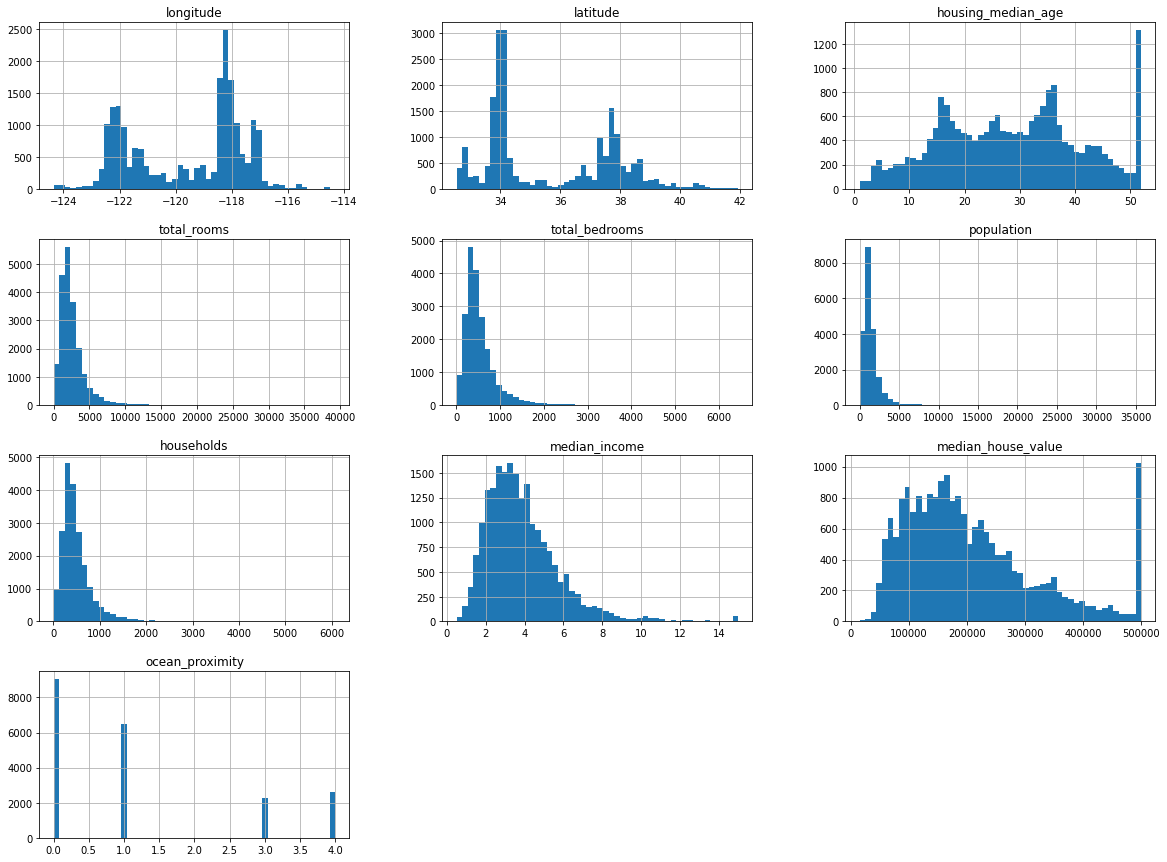

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
df = df[np.array(df['median_house_value'] < 500001) & np.array(df['housing_median_age'] < 51)]
df.describe()
print(len(df))

18336


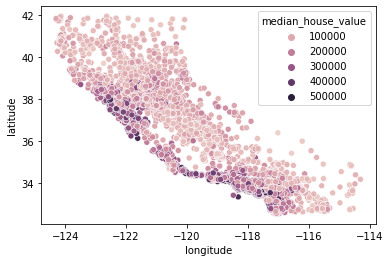

In [ ]:
sns.scatterplot(data = df, x='longitude', y='latitude', hue='median_house_value')

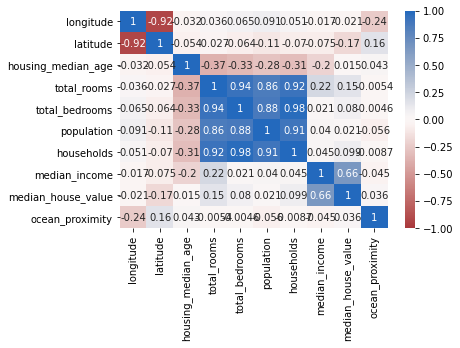

In [ ]:
sns.heatmap(df.corr(), annot = True, cmap = 'vlag_r', vmin = -1, vmax = 1)

**LINEAR REGRESSION**

In [ ]:
from numpy.linalg import inv
from numpy.linalg import det
from numpy import dot


In [ ]:
# Log transformed data

x=np.log(df["total_bedrooms"]) 
y=np.log(df["total_rooms"])
constant_term = np.ones(len(x)) 

x = np.c_[constant_term, x]
beta = dot(dot(inv(dot(x.T, x)),x.T),y) 
predictions_with_intercept = dot(x,beta) 


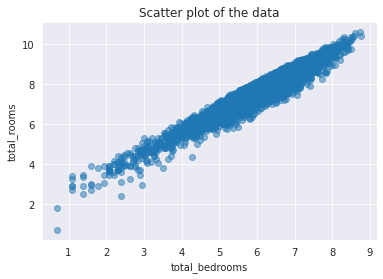

In [ ]:
# Scatterplot of the data

import seaborn as sns
sns.set_style("darkgrid")
ax = sns.regplot(x=x[:,1], y=y, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='total_bedrooms', 
       ylabel='total_rooms',
       title='Scatter plot of the data'
       );
plt.show()

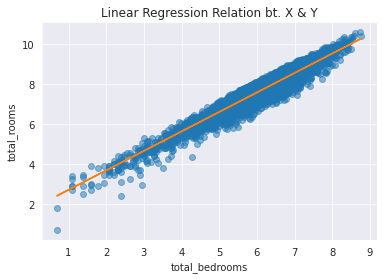

In [ ]:
# Scatter plot of the data and regression line

import seaborn as sns
sns.set_style("darkgrid")
ax = sns.regplot(x=x[:,1], y=y, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='total_bedrooms', 
       ylabel='total_rooms',
       title='Linear Regression Relation bt. X & Y'
       );
plt.plot(x[:,1], predictions_with_intercept) # overlay a line plot over a scatter plot 
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


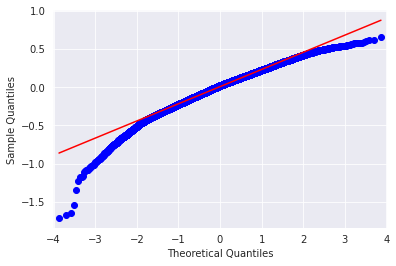

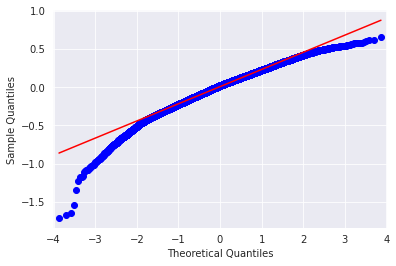

In [ ]:
import statsmodels.api as sm
import scipy.stats as stats

# fig, axs = plt.subplots( figsize=(10, 6)) 
# re-computing our model values

predictions = np.dot(x,beta)
residuals = y - predictions
degrees_of_freedom = len(y) - x.shape[1]
standardized_residuals=(residuals-np.mean(residuals))/np.std(residuals)

sm.qqplot(residuals,line='q')


In [ ]:
# Verify the gaussianity of Residuals

import scipy
scipy.stats.shapiro(residuals)[1]

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


7.791219461645983e-43

In [ ]:
### SSTotal
def ss_total(y):
    return np.sum((y-np.mean(y))**2)

# The regression sum of squares, also called the explained sum of squares:
def ss_reg(pred, y):
    return np.sum((pred-np.mean(y))**2)

# The sum of squares of residuals, also called the residual sum of squares:
def ss_res(pred, y):
    return np.sum((y-pred)**2)

# SStotal
sstotal = ss_total(y)

# We could also obtain SStotal using the target's variance
# don't forget to get an unbiased estimate of the variance 
ss_total_using_variance = (len(y) - 1 ) * np.var(y, ddof=1) 

# SSReg
ssreg = ss_reg(predictions_with_intercept, y)

# SSRes
ssres = ss_res(predictions_with_intercept, y)

### R^2
rsq_with_intercept = 1 - (ssres / sstotal)

### rho
n=len(df)
rho=(np.sum(x[:,1]*y)-np.sum(x[:,1])*np.sum(y)/n)/(np.sqrt(np.sum(x[:,1]**2)-(np.sum(x[:,1])**2)/n)*np.sqrt(np.sum(y**2)-(np.sum(y)**2)/n))

print('SStotal:', round(sstotal,4))
print('SSreg:', round(ssreg,4))
print('SSres:', round(ssres,4))
print('Coefficient of Determinacy, model with intercept:', np.round(rsq_with_intercept,4))
print('Correlation coefficent: ',round(rho,4))

SStotal: 10058.7243
SSreg: 9061.147
SSres: 997.5773
Coefficient of Determinacy, model with intercept: 0.9008
Correlation coefficent:  0.9491


Text(0.5, 1.0, 'Standardized Residuals vs Fitted value')

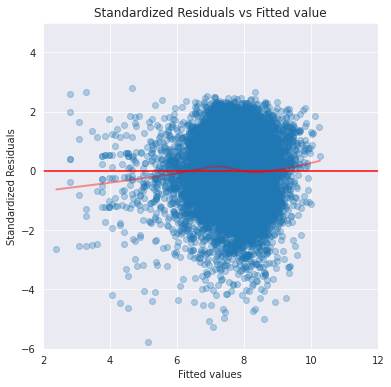

In [ ]:
# Plot of standardized residuals vs fitted values

fig, axs = plt.subplots(ncols=1, figsize=(6, 6)) 
residuals_standard_error = np.sqrt(np.sum(residuals**2)/degrees_of_freedom)
mean_independent_variable = np.mean(x,axis=0)[1]
leverage = 1/x.shape[0]+((x[:,1]-mean_independent_variable)**2)/np.sum((x[:,1]-mean_independent_variable)**2)
standardized_rediduals =(residuals)/(residuals_standard_error*np.sqrt(1-leverage))
sns.regplot(x=predictions, 
            y=standardized_rediduals, 
            ax=axs,
            lowess=True, 
            scatter_kws={'alpha':0.3}, 
            line_kws={"color":"r","alpha":0.4,"lw":2})
plt.plot(np.arange(len(standardized_rediduals)), [0]*len(standardized_rediduals), 'r-')
axs.set_ylim(-6,5)

axs.set_xlim(2,12)

axs.set(ylabel='Standardized Residuals', 
           xlabel='Fitted values')
axs.set_title(label = 'Standardized Residuals vs Fitted value')

In [ ]:
sigma_degrees_of_freedom = len(df)-2
sigma_sqr = (np.sum(residuals**2)/sigma_degrees_of_freedom)

variance_covmatrix = sigma_sqr*np.linalg.inv(np.dot(x.T,x))
coeff_stde =np.sqrt(np.diag(variance_covmatrix))

# print('Coefficients\' Standard Errors:',coeff_stde)
# sigma_degrees_of_freedom

In [ ]:
# T-test for existence of linear relation
expected_value = 0.0

# For each coefficient
for i in range(len(beta)):    
    ttest = (beta[i]-expected_value)/coeff_stde[i] 

    # Degrees of freedom
    dof = x.shape[0] - (i+1)
    # https://stats.stackexchange.com/a/140395
    
    pval = stats.t.sf(np.abs(ttest), dof)*2  # two-sided pvalue = Prob(abs(t)>tt)
    # https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html#t-test-and-ks-test


    print('Test statistc for coefficient estimate ',i,':',ttest,'| P-value:', pval)

Test statistc for coefficient estimate  0 : 118.29604544059922 | P-value: 0.0
Test statistc for coefficient estimate  1 : 408.0815222459117 | P-value: 0.0


In [ ]:
# Conf interval for beta_0 and beta_1 

n=len(df)
alpha = 0.05
t_stud_val = stats.t.ppf( [alpha/2,1-alpha/2], n-2)

conf_int_coeff=np.array([[beta[0]+coeff_stde[0]*t_stud_val[0], beta[0]+coeff_stde[0]*t_stud_val[1]],[beta[1]+coeff_stde[1]*t_stud_val[0],beta[1]+coeff_stde[1]*t_stud_val[1]]]).reshape(2,2)
conf_int_coeff

array([[1.69859712, 1.75583495],
       [0.96954628, 0.97890506]])

In [ ]:
# Conf Interval for correlation Coeff

conf_int_rho=np.array([rho+t_stud_val[0]*np.sqrt((1-rho**2)/(n-2)), rho+t_stud_val[1]*np.sqrt((1-rho**2)/(n-2))])
conf_int_rho


array([0.94455905, 0.95367663])

In [ ]:
# Prediction and Conf intervals for a particular observation

xp=4.7
var=np.sum((x[:,1]-np.mean(x[:,1]))**2)
sigma=sum(residuals**2)/(n-2)
xp1=np.array([1, 4.7])
z=dot(beta,xp1)
ci_y=[z+sigma*t_stud_val[0]*np.sqrt( 1+1/n+ ((xp-np.mean(x[:,1]))**2)/var),z+sigma*t_stud_val[1]*np.sqrt (1+1/n+ ((xp-np.mean(x[:,1]))**2)/var)]
ci_y_mean=[z+sigma*t_stud_val[0]*np.sqrt( 1/n+ ((xp-np.mean(x[:,1]))**2)/var),z+sigma*t_stud_val[1]*np.sqrt (1/n+ ((xp-np.mean(x[:,1]))**2)/var)]
print('ci_y_mean: ',ci_y_mean)
print('ci_y: ',ci_y)

ci_y_mean:  [6.304383444235555, 6.307769944112167]
ci_y:  [6.199411971566793, 6.4127414167809285]
